# Homework #2 (option #2) - Image 3

## Haesook Ma

**Homework2: Pick 3 of your own images and create a visualization that shows how *similar/different* these images are using these histogramming methods presented in class.**

My 3rd image is the photo that I took at the grocery store. There are several reasons why I chose this image for my analysis. First, I only analyzed simple images for my 1st and 2nd analysis (Ryan and Vaccine iamge). So, at this time, I would like to analyze a color set of a natural photo. Secondly, this photo has various colors, so I would like to know what color set it has.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

In [3]:
im3 = Image.open("Vegetable.png") # saved the image in the local 

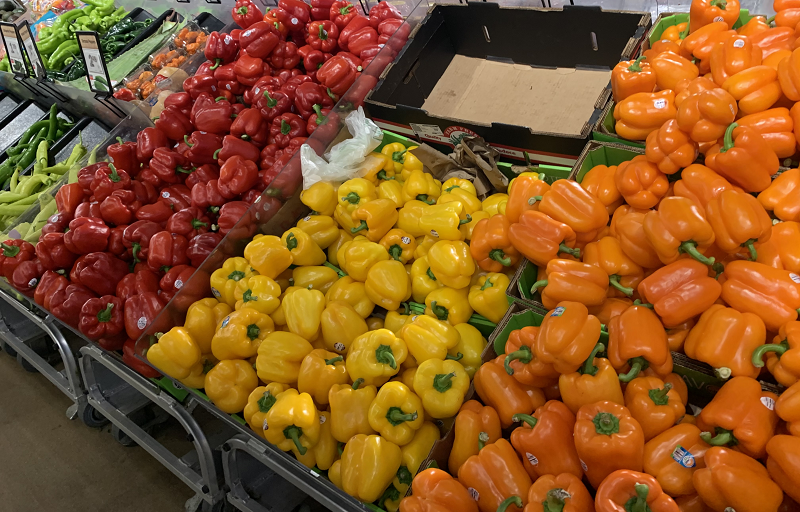

In [4]:
im3

In [5]:
im3_data = np.array(im3)

In [6]:
im3_data

array([[[160, 165, 169, 255],
        [161, 165, 169, 255],
        [142, 147, 148, 255],
        ...,
        [251, 132,  70, 255],
        [246, 134,  72, 255],
        [249, 146,  86, 255]],

       [[133, 139, 140, 255],
        [100, 106, 105, 255],
        [ 96, 103,  99, 255],
        ...,
        [248, 118,  33, 255],
        [249, 123,  36, 255],
        [246, 126,  43, 255]],

       [[112, 117, 114, 255],
        [123, 130, 123, 255],
        [117, 124, 116, 255],
        ...,
        [243, 113,  27, 255],
        [243, 113,  27, 255],
        [242, 115,  30, 255]],

       ...,

       [[ 87,  76,  58, 255],
        [ 88,  77,  59, 255],
        [ 86,  75,  57, 255],
        ...,
        [ 43,   2,   0, 255],
        [ 47,   6,   2, 255],
        [ 46,   5,   1, 255]],

       [[ 87,  76,  58, 255],
        [ 88,  77,  59, 255],
        [ 90,  79,  61, 255],
        ...,
        [ 47,   5,   0, 255],
        [ 48,   6,   0, 255],
        [ 47,   5,   0, 255]],

       [[ 88

In [7]:
im3_data.shape

(512, 800, 4)

In [8]:
im3_data.shape[2]

4

In [9]:
np.unique(im3_data)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## After checking the number of colors in the image

I discovered there are many colors in the image. Thus, I decided to use the following code to covert the image with *8 colors:*

In [10]:
import scipy
import scipy.misc
import scipy.cluster

# NOTE: I copied the following code from the professor's notebook. 
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In [11]:
new_im3, new_rgbs = convert_image(im3, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 70.69545289  67.44081896  44.24161047]
 [127.37118725 111.66244975  83.1667097 ]
 [ 29.98285046  23.17661235  14.04427097]
 [187.42345141 169.46057583 139.52162356]
 [183.20812183  99.21317436  14.09618699]
 [ 93.72754728  25.1891134    9.5824405 ]
 [139.66408055  61.35153007  17.99032555]
 [214.06231416 136.78856668  32.24135947]]


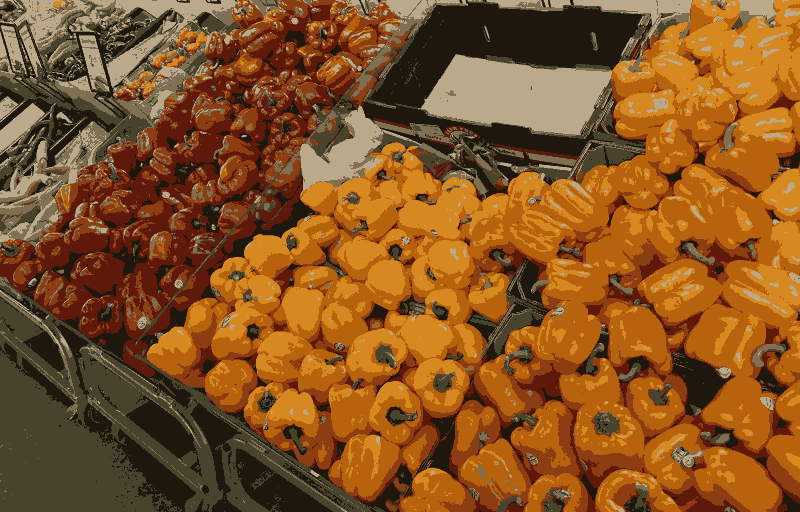

In [12]:
new_im3

In [13]:
new_im3_data = np.array(new_im3)

In [14]:
new_im3_data

array([[[187, 169, 140],
        [187, 169, 140],
        [187, 169, 140],
        ...,
        [214, 137,  32],
        [214, 137,  32],
        [214, 137,  32]],

       [[187, 169, 140],
        [127, 112,  83],
        [127, 112,  83],
        ...,
        [214, 137,  32],
        [214, 137,  32],
        [214, 137,  32]],

       [[127, 112,  83],
        [127, 112,  83],
        [127, 112,  83],
        ...,
        [214, 137,  32],
        [214, 137,  32],
        [214, 137,  32]],

       ...,

       [[ 71,  67,  44],
        [ 71,  67,  44],
        [ 71,  67,  44],
        ...,
        [ 30,  23,  14],
        [ 30,  23,  14],
        [ 30,  23,  14]],

       [[ 71,  67,  44],
        [ 71,  67,  44],
        [ 71,  67,  44],
        ...,
        [ 30,  23,  14],
        [ 30,  23,  14],
        [ 30,  23,  14]],

       [[ 71,  67,  44],
        [ 71,  67,  44],
        [ 71,  67,  44],
        ...,
        [ 30,  23,  14],
        [ 30,  23,  14],
        [ 30,  23,  14]]

In [15]:
new_im3_data.shape

(512, 800, 3)

In [16]:
np.unique(new_im3_data)

array([ 10,  14,  18,  23,  25,  30,  32,  44,  61,  67,  71,  83,  94,
        99, 112, 127, 137, 140, 169, 183, 187, 214], dtype=uint8)

In [20]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(new_im3_data.shape[2]) :
    print('channel = ', channel_labels[i], ', unique values = ', np.unique(new_im3_data[:,:,i]))

channel =  R , unique values =  [ 30  71  94 127 140 183 187 214]
channel =  G , unique values =  [ 23  25  61  67  99 112 137 169]
channel =  B , unique values =  [ 10  14  18  32  44  83 140]


In [21]:
new_im3_data.reshape(-1, new_im3_data.shape[2])

array([[187, 169, 140],
       [187, 169, 140],
       [187, 169, 140],
       ...,
       [ 30,  23,  14],
       [ 30,  23,  14],
       [ 30,  23,  14]], dtype=uint8)

In [23]:
new_im3_data.reshape(-1, new_im3_data.shape[2])

array([[187, 169, 140],
       [187, 169, 140],
       [187, 169, 140],
       ...,
       [ 30,  23,  14],
       [ 30,  23,  14],
       [ 30,  23,  14]], dtype=uint8)

In [24]:
new_im3_data.reshape(-1, new_im3_data.shape[2]).shape

(409600, 3)

In [25]:
np.unique(new_im3_data.reshape(-1, new_im3_data.shape[2]), axis = 0)

array([[ 30,  23,  14],
       [ 71,  67,  44],
       [ 94,  25,  10],
       [127, 112,  83],
       [140,  61,  18],
       [183,  99,  14],
       [187, 169, 140],
       [214, 137,  32]], dtype=uint8)

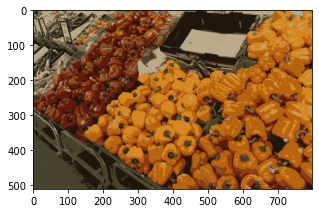

In [27]:
fig, ax = plt.subplots(figsize = (5,5))

ax.imshow(new_im3_data)

plt.show()

## Color sorting

There are 8 colors. In order to visually show the color set, I found the color code and added on the comments. I will use the color code when I make a barchart.

In [42]:
# [30,  23,  14], color code = #1e170e (black)
pixel_black = (new_im3_data[:,:,0] == 30) & (new_im3_data[:,:,1] == 23) & (new_im3_data[:,:, 2] == 14) 

# [71,  67,  44], color code = #47432c (dark_green)
pixel_dark_green = (new_im3_data[:,:,0] == 71) & (new_im3_data[:,:,1] == 67) & (new_im3_data[:,:, 2] == 44) 

# [94,  25,  10], color code = #5e190a (dark_red)
pixel_dark_red = (new_im3_data[:,:,0] == 94) & (new_im3_data[:,:,1] == 25) & (new_im3_data[:,:, 2] == 10) 

# [127, 112,  83], color code = #7f6f53 (dark_yellow)
pixel_dark_yellow = (new_im3_data[:,:,0] == 127) & (new_im3_data[:,:,1] == 112) & (new_im3_data[:,:, 2] == 83) 

# [140,  61,  18], color code = #8c3d12 (dark_orange)
pixel_dark_orange = (new_im3_data[:,:,0] == 140) & (new_im3_data[:,:,1] == 61) & (new_im3_data[:,:, 2] == 18) 

# [183,  99,  14], color code = #b7630e (light_orange)
pixel_medium_orange = (new_im3_data[:,:,0] == 183) & (new_im3_data[:,:,1] == 99) & (new_im3_data[:,:, 2] == 14) 

# [187, 169, 140], color code = #bba98c (light_yellow)
pixel_light_yellow = (new_im3_data[:,:,0] == 187) & (new_im3_data[:,:,1] == 169) & (new_im3_data[:,:, 2] == 140) 

# [214, 137,  32], color code = #d68920 (orange)
pixel_orange = (new_im3_data[:,:,0] == 214) & (new_im3_data[:,:,1] == 137) & (new_im3_data[:,:, 2] == 32) 

In [43]:
black = len(new_im3_data[pixel_black])
dark_green = len(new_im3_data[pixel_dark_green])
dark_red = len(new_im3_data[pixel_dark_red])
dark_yellow = len(new_im3_data[pixel_dark_yellow])
dark_orange = len(new_im3_data[pixel_dark_orange])
medium_orange = len(new_im3_data[pixel_medium_orange])
light_yellow = len(new_im3_data[pixel_light_yellow])
orange = len(new_im3_data[pixel_orange])

In [44]:
black, dark_green, dark_red, dark_yellow, dark_orange, medium_orange, light_yellow, orange

(56328, 52685, 42708, 26605, 47622, 95152, 33017, 55483)

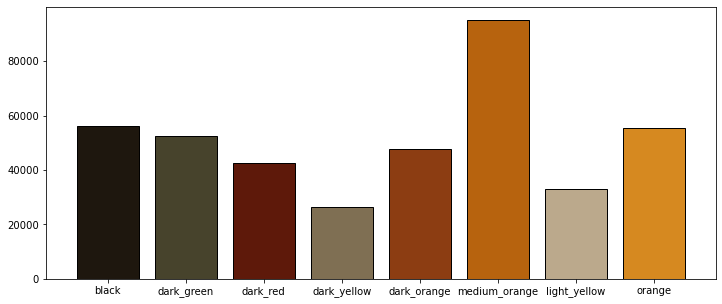

In [45]:
fig, ax = plt.subplots(figsize=(12,5))

labels = np.array(['black', 'dark_green', 'dark_red', 'dark_yellow', 'dark_orange', 'medium_orange', 'light_yellow', 'orange']) # labels for our x-axis
values = np.array([black, dark_green, dark_red, dark_yellow, dark_orange, medium_orange, light_yellow, orange]) # heights for our y-axis

colors = np.array(['#1e170e', '#47432c', '#5e190a', '#7f6f53', '#8c3d12', '#b7630e', '#bba98c', '#d68920'])

myBarChart = ax.bar(labels, values) # is another plotting routine in matplotlib (barchart)

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(colors[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')
    
plt.show()

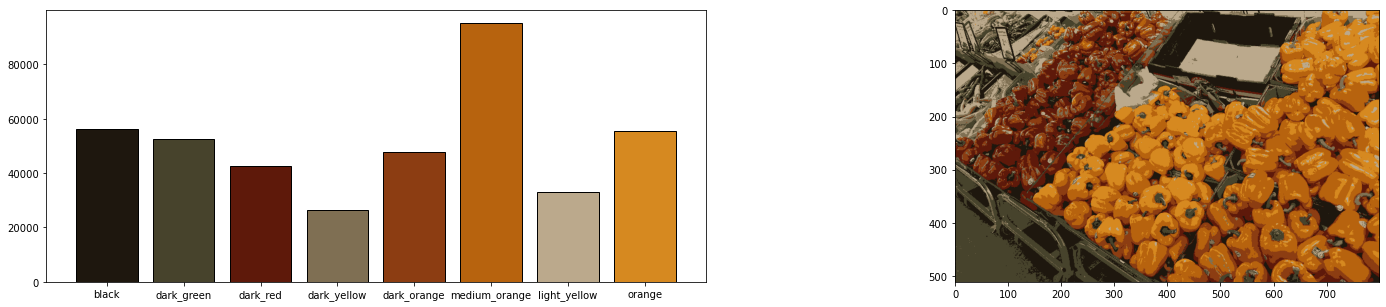

In [48]:
fig, ax = plt.subplots(1,2, figsize=(26,5))

labels = np.array(['black', 'dark_green', 'dark_red', 'dark_yellow', 'dark_orange', 'medium_orange', 'light_yellow', 'orange']) # labels for our x-axis
values = np.array([black, dark_green, dark_red, dark_yellow, dark_orange, medium_orange, light_yellow, orange]) # heights for our y-axis

colors = np.array(['#1e170e', '#47432c', '#5e190a', '#7f6f53', '#8c3d12', '#b7630e', '#bba98c', '#d68920'])

myBarChart = ax[0].bar(labels, values) # is another plotting routine in matplotlib (barchart)

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(colors[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')

#also plot image
ax[1].imshow(new_im3_data)
    
plt.show()

## To conclude

It was interesting to convert a natural photo to a image with 8 colors. By doing so, I was able to analyze the image. There were several similarities and differences between the Vegetable image and the Stitch image. 

(1) After converting the image, I was able to analyze the Vegetable image just like the Stitch image. 

(2) Unlike the Stitch image, the Vegetable image had more color sets. 

From this image, I could not make a meaningful result as the Stitch image, but I could learn how to analyze a photo with various colors. 